In [75]:
import pandas as pd
import numpy as np
import seaborn as sns

In [76]:
cc_df = pd.read_csv('fraud.csv')

In [77]:
pd.set_option('display.max_columns', 50)

In [78]:
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


In [79]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

In [80]:
cc_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


In [81]:
#필요없는 컬럼 제거

In [82]:
cc_df.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0


In [83]:
cc_df.drop(['merchant','first','last','street','city','state','zip','job','trans_num','unix_time'], axis = 1, inplace= True)

In [84]:
#카드 번호로 정렬
cc_df.sort_values('cc_num')

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud
378075,2020-08-05 17:03:19,503874407318,shopping_pos,7.77,M,29.5894,-98.5201,1595797,1975-12-28,30.014539,-98.426767,0
230588,2019-12-20 22:21:36,503874407318,health_fitness,72.06,M,29.5894,-98.5201,1595797,1975-12-28,29.260487,-97.961746,0
421413,2020-10-10 12:39:32,503874407318,misc_pos,4.78,M,29.5894,-98.5201,1595797,1975-12-28,29.116928,-99.258936,0
468378,2020-12-13 15:55:44,503874407318,kids_pets,84.56,M,29.5894,-98.5201,1595797,1975-12-28,29.994537,-98.441297,0
345085,2020-06-22 23:52:06,503874407318,entertainment,24.33,M,29.5894,-98.5201,1595797,1975-12-28,29.277168,-98.239289,0
...,...,...,...,...,...,...,...,...,...,...,...,...
53631,2019-04-14 16:57:31,4956828990005111019,entertainment,27.41,M,40.6747,-74.2239,124967,1980-12-21,39.888460,-74.151440,0
485223,2020-12-27 14:14:40,4956828990005111019,home,28.52,M,40.6747,-74.2239,124967,1980-12-21,41.068207,-75.015316,0
264968,2020-02-15 13:32:48,4956828990005111019,shopping_pos,2.95,M,40.6747,-74.2239,124967,1980-12-21,41.435438,-73.839008,0
63475,2019-04-30 17:45:09,4956828990005111019,shopping_pos,7.28,M,40.6747,-74.2239,124967,1980-12-21,41.149072,-75.143152,0


In [85]:
#fraud 자료 대한 확인
cc_df[cc_df['is_fraud'] != 0] 

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud
4794,2019-01-12 00:59:01,581686439828,gas_transport,11.73,M,41.5205,-80.0573,5507,1973-07-28,41.947427,-79.796264,1
4816,2019-01-12 03:48:07,581686439828,grocery_pos,328.68,M,41.5205,-80.0573,5507,1973-07-28,42.148618,-79.398595,1
4979,2019-01-12 15:46:10,581686439828,food_dining,120.58,M,41.5205,-80.0573,5507,1973-07-28,42.470024,-80.126576,1
5073,2019-01-12 19:53:59,581686439828,shopping_net,1081.35,M,41.5205,-80.0573,5507,1973-07-28,42.455406,-79.521640,1
5124,2019-01-12 22:44:05,581686439828,shopping_net,776.70,M,41.5205,-80.0573,5507,1973-07-28,40.680209,-79.099101,1
...,...,...,...,...,...,...,...,...,...,...,...,...
477832,2020-12-21 02:21:41,4716561796955522,grocery_pos,358.24,F,48.2777,-112.8456,743,1972-05-04,47.526202,-113.643313,1
477847,2020-12-21 02:36:03,4716561796955522,shopping_net,859.12,F,48.2777,-112.8456,743,1972-05-04,48.272348,-112.328075,1
479296,2020-12-21 22:38:38,4716561796955522,home,209.84,F,48.2777,-112.8456,743,1972-05-04,49.173669,-112.698767,1
479305,2020-12-21 22:42:11,4716561796955522,food_dining,123.58,F,48.2777,-112.8456,743,1972-05-04,48.913048,-113.214921,1


In [86]:
cc_df['cc_num'].value_counts()

6538441737335434    4392
30270432095985      4392
4364010865167176    4386
4642255475285942    4386
6538891242532018    4386
                    ... 
36913587729122      3641
4681601008538160    3638
30551643947183      3638
4005676619255478    3638
3511378610369890    3628
Name: cc_num, Length: 124, dtype: int64

In [87]:
#결제금액의 평균, 표준편차 계산
amt_info = cc_df.groupby('cc_num')['amt'].agg(['mean','std']).reset_index()

In [88]:
amt_info.head()

,cc_num,mean,std
0,503874407318,60.253406,127.265783
1,567868110212,83.442558,117.303828
2,571365235126,59.392974,134.289959
3,581686439828,58.578675,149.804992
4,630423337322,56.078113,159.201852


In [89]:
#원본데이터와 cc_num 기준으로 결합
cc_df = cc_df.merge(amt_info, on = 'cc_num', how  = 'left')

In [90]:
#결제금액을 기준으로 z-score 계산
cc_df['amt_z'] = (cc_df['amt'] - cc_df['mean']) / cc_df['std']

In [91]:
cc_df.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,mean,std,amt_z
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,56.078113,159.201852,0.321302
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,59.858059,132.138802,-0.114637
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,87.328067,113.454416,-0.361802
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,64.317839,174.739042,-0.001304
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,90.747123,165.470881,-0.393828


In [92]:
cc_df[cc_df['is_fraud'] != 0]

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,mean,std,amt_z
4794,2019-01-12 00:59:01,581686439828,gas_transport,11.73,M,41.5205,-80.0573,5507,1973-07-28,41.947427,-79.796264,1,58.578675,149.804992,-0.312731
4816,2019-01-12 03:48:07,581686439828,grocery_pos,328.68,M,41.5205,-80.0573,5507,1973-07-28,42.148618,-79.398595,1,58.578675,149.804992,1.803020
4979,2019-01-12 15:46:10,581686439828,food_dining,120.58,M,41.5205,-80.0573,5507,1973-07-28,42.470024,-80.126576,1,58.578675,149.804992,0.413880
5073,2019-01-12 19:53:59,581686439828,shopping_net,1081.35,M,41.5205,-80.0573,5507,1973-07-28,42.455406,-79.521640,1,58.578675,149.804992,6.827351
5124,2019-01-12 22:44:05,581686439828,shopping_net,776.70,M,41.5205,-80.0573,5507,1973-07-28,40.680209,-79.099101,1,58.578675,149.804992,4.793708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477832,2020-12-21 02:21:41,4716561796955522,grocery_pos,358.24,F,48.2777,-112.8456,743,1972-05-04,47.526202,-113.643313,1,52.537867,106.113023,2.880911
477847,2020-12-21 02:36:03,4716561796955522,shopping_net,859.12,F,48.2777,-112.8456,743,1972-05-04,48.272348,-112.328075,1,52.537867,106.113023,7.601161
479296,2020-12-21 22:38:38,4716561796955522,home,209.84,F,48.2777,-112.8456,743,1972-05-04,49.173669,-112.698767,1,52.537867,106.113023,1.482402
479305,2020-12-21 22:42:11,4716561796955522,food_dining,123.58,F,48.2777,-112.8456,743,1972-05-04,48.913048,-113.214921,1,52.537867,106.113023,0.669495


In [93]:
#불필요한 mean, std 칼럼 제거
cc_df.drop(['mean','std'], axis = 1, inplace = True)

In [94]:
cc_df.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,-0.114637
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,-0.361802
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,-0.001304
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,-0.393828


In [95]:
# cc_num, category 별로 묶음 컬럼의 값에 대한  결제금액의 평균, 표준편차를 계산

cat_info = cc_df.groupby(['cc_num','category'])['amt'].agg(['mean','std']).reset_index()

In [96]:
cat_info.head()

,cc_num,category,mean,std
0,503874407318,entertainment,73.282418,103.050402
1,503874407318,food_dining,38.712305,46.548436
2,503874407318,gas_transport,68.457820,14.730440
3,503874407318,grocery_net,48.931302,18.736252
4,503874407318,grocery_pos,61.987806,23.449569


In [97]:
#원본데이터와 cat_info 데이터를 cc_num, category기준으로 결합
cc_df = cc_df.merge(cat_info, on = ['cc_num', 'category'], how = 'left')

In [98]:
cc_df.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z,mean,std
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,99.637224,23.904424
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,-0.114637,60.694144,24.513316
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,-0.361802,60.427269,19.558574
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,-0.001304,59.145831,23.345746
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,-0.393828,86.794025,106.330185


In [99]:
#cc_num, category 별로 묶음 컬럼의 값에 대한  결제금액의 평균, 표준편차 제거
cc_df.drop(['mean','std'], axis =1 , inplace = True)

In [100]:
cc_df.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,-0.114637
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,-0.361802
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,-0.001304
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,-0.393828


In [101]:
#생년월일 컬럼을 태어난 연도로만 분리 
cc_df['dob'] = pd.to_datetime(cc_df['dob']).dt.year

In [102]:
cc_df.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978,49.159047,-118.186462,0,0.321302
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980,40.079588,-74.848087,0,-0.114637
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974,40.021888,-74.228188,0,-0.361802
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971,42.360426,-83.552316,0,-0.001304
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977,29.737426,-90.853194,0,-0.393828


In [103]:
cc_df.rename(columns={'dob': 'birth_year'}, inplace=True)

In [104]:
cc_df.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,birth_year,merch_lat,merch_long,is_fraud,amt_z
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978,49.159047,-118.186462,0,0.321302
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980,40.079588,-74.848087,0,-0.114637
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974,40.021888,-74.228188,0,-0.361802
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971,42.360426,-83.552316,0,-0.001304
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977,29.737426,-90.853194,0,-0.393828


In [105]:
#결제시간 타입을 변경하고, 결제 시간(hour)을 구분하여 카테고리화

In [106]:
cc_df['hour'] = pd.to_datetime(cc_df['trans_date_trans_time']).dt.hour

In [107]:
cc_df.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,birth_year,merch_lat,merch_long,is_fraud,amt_z,hour
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978,49.159047,-118.186462,0,0.321302,0
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980,40.079588,-74.848087,0,-0.114637,0
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974,40.021888,-74.228188,0,-0.361802,0
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971,42.360426,-83.552316,0,-0.001304,0
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977,29.737426,-90.853194,0,-0.393828,0


In [108]:
def hour_func(x):
    if (x >= 6) & (x < 12):
        return 'morning'
    elif (x >= 12) & (x < 18):
        return 'afternoon'
    elif (x >= 18) & (x < 23):
        return 'night'
    else:
        return 'evening'
    

In [109]:
cc_df['hour_cat'] = cc_df['hour'].apply(hour_func)

In [110]:
cc_df.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,birth_year,merch_lat,merch_long,is_fraud,amt_z,hour,hour_cat
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978,49.159047,-118.186462,0,0.321302,0,evening
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980,40.079588,-74.848087,0,-0.114637,0,evening
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974,40.021888,-74.228188,0,-0.361802,0,evening
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971,42.360426,-83.552316,0,-0.001304,0,evening
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977,29.737426,-90.853194,0,-0.393828,0,evening


In [111]:
cc_df['hour_cat'].value_counts()

afternoon    176801
night        146697
evening       98662
morning       68974
Name: hour_cat, dtype: int64

In [112]:
all_cnt = cc_df.groupby('cc_num')['amt'].count().reset_index()

In [113]:
hour_cnt = cc_df.groupby(['cc_num','hour_cat'])['amt'].count().reset_index()

In [114]:
all_cnt.head()

,cc_num,amt
0,503874407318,3655
1,567868110212,3644
2,571365235126,4374
3,581686439828,3653
4,630423337322,4362


In [115]:
hour_cnt.head()

,cc_num,hour_cat,amt
0,503874407318,afternoon,1280
1,503874407318,evening,737
2,503874407318,morning,558
3,503874407318,night,1080
4,567868110212,afternoon,1228


In [116]:
hour_cnt = hour_cnt.merge(all_cnt, on = 'cc_num', how = 'left')

In [117]:
hour_cnt.head()

,cc_num,hour_cat,amt_x,amt_y
0,503874407318,afternoon,1280,3655
1,503874407318,evening,737,3655
2,503874407318,morning,558,3655
3,503874407318,night,1080,3655
4,567868110212,afternoon,1228,3644


In [118]:
hour_cnt = hour_cnt.rename({'amt_x' : 'hour_cnt', 'amt_y' : 'total_cnt'}, axis = 1)

In [119]:
hour_cnt.head()

,cc_num,hour_cat,hour_cnt,total_cnt
0,503874407318,afternoon,1280,3655
1,503874407318,evening,737,3655
2,503874407318,morning,558,3655
3,503874407318,night,1080,3655
4,567868110212,afternoon,1228,3644


In [120]:
#전체 거래 건수(total_cnt)에 대한 시간대별 거래 건수(hour_cnt)의 비율을 계산
hour_cnt['hour_perc'] = hour_cnt['hour_cnt'] / hour_cnt['total_cnt']

In [121]:
hour_cnt.head(10)

,cc_num,hour_cat,hour_cnt,total_cnt,hour_perc
0,503874407318,afternoon,1280,3655,0.350205
1,503874407318,evening,737,3655,0.201642
2,503874407318,morning,558,3655,0.152668
3,503874407318,night,1080,3655,0.295486
4,567868110212,afternoon,1228,3644,0.336992
5,567868110212,evening,820,3644,0.225027
6,567868110212,morning,529,3644,0.145170
7,567868110212,night,1067,3644,0.292810
8,571365235126,afternoon,1523,4374,0.348194
9,571365235126,evening,943,4374,0.215592


In [122]:
hour_cnt.loc[0:3]['hour_perc'].sum()

1.0

In [123]:
hour_cnt.tail(10)

,cc_num,hour_cat,hour_cnt,total_cnt,hour_perc
486,4861310130652566408,morning,529,3643,0.145210
487,4861310130652566408,night,1033,3643,0.283558
488,4906628655840914250,afternoon,1282,3655,0.350752
489,4906628655840914250,evening,800,3655,0.218878
490,4906628655840914250,morning,500,3655,0.136799
491,4906628655840914250,night,1073,3655,0.293570
492,4956828990005111019,afternoon,1277,3657,0.349193
493,4956828990005111019,evening,784,3657,0.214383
494,4956828990005111019,morning,558,3657,0.152584
495,4956828990005111019,night,1038,3657,0.283839


In [124]:
cc_df.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,birth_year,merch_lat,merch_long,is_fraud,amt_z,hour,hour_cat
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978,49.159047,-118.186462,0,0.321302,0,evening
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980,40.079588,-74.848087,0,-0.114637,0,evening
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974,40.021888,-74.228188,0,-0.361802,0,evening
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971,42.360426,-83.552316,0,-0.001304,0,evening
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977,29.737426,-90.853194,0,-0.393828,0,evening


In [125]:
#필요한 컬럼만 저장
hour_cnt = hour_cnt[['cc_num','hour_cat','hour_perc']]

In [126]:
#원본데이터와 결합
cc_df = cc_df.merge(hour_cnt, on = ['cc_num', 'hour_cat'], how = 'left')

In [127]:
cc_df.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,birth_year,merch_lat,merch_long,is_fraud,amt_z,hour,hour_cat,hour_perc
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978,49.159047,-118.186462,0,0.321302,0,evening,0.196470
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980,40.079588,-74.848087,0,-0.114637,0,evening,0.214383
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974,40.021888,-74.228188,0,-0.361802,0,evening,0.217252
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971,42.360426,-83.552316,0,-0.001304,0,evening,0.213600
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977,29.737426,-90.853194,0,-0.393828,0,evening,0.202882


In [128]:
cc_df.drop(['trans_date_trans_time', 'hour', 'hour_cat'], axis =1 , inplace = True)

In [129]:
cc_df.head()

,cc_num,category,amt,gender,lat,long,city_pop,birth_year,merch_lat,merch_long,is_fraud,amt_z,hour_perc
0,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978,49.159047,-118.186462,0,0.321302,0.196470
1,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980,40.079588,-74.848087,0,-0.114637,0.214383
2,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974,40.021888,-74.228188,0,-0.361802,0.217252
3,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971,42.360426,-83.552316,0,-0.001304,0.213600
4,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977,29.737426,-90.853194,0,-0.393828,0.202882


In [130]:
!pip install geopy

In [131]:
from geopy.distance import distance

In [132]:
#결제자의 주소와 실제 결제가 이루어진 상점간의 거리를 계산 
cc_df['distance'] = cc_df.apply(lambda x: distance((x['lat'], x['long']), (x['merch_lat'], x['merch_long'])).km, axis = 1)

In [133]:
from datetime import datetime

In [134]:
cc_df.head()

,cc_num,category,amt,gender,lat,long,city_pop,birth_year,merch_lat,merch_long,is_fraud,amt_z,hour_perc,distance
0,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978,49.159047,-118.186462,0,0.321302,0.196470,30.216618
1,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980,40.079588,-74.848087,0,-0.114637,0.214383,84.714605
2,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974,40.021888,-74.228188,0,-0.361802,0.217252,67.768167
3,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971,42.360426,-83.552316,0,-0.001304,0.213600,22.322745
4,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977,29.737426,-90.853194,0,-0.393828,0.202882,79.398244


In [135]:
dist_info = cc_df.groupby('cc_num')['distance'].agg(['mean','std'])

In [136]:
dist_info.head()

,mean,std
cc_num,,
503874407318,79.746738,29.741044
567868110212,79.356969,30.524201
571365235126,73.651715,28.863007
581686439828,74.428143,28.605102
630423337322,71.656621,28.090646


In [138]:
cc_df.head()

,cc_num,category,amt,gender,lat,long,city_pop,birth_year,merch_lat,merch_long,is_fraud,amt_z,hour_perc,distance
0,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978,49.159047,-118.186462,0,0.321302,0.196470,30.216618
1,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980,40.079588,-74.848087,0,-0.114637,0.214383,84.714605
2,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974,40.021888,-74.228188,0,-0.361802,0.217252,67.768167
3,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971,42.360426,-83.552316,0,-0.001304,0.213600,22.322745
4,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977,29.737426,-90.853194,0,-0.393828,0.202882,79.398244


In [139]:
cc_df = cc_df.merge(dist_info, on ='cc_num', how = 'left')

In [140]:
cc_df.head()

,cc_num,category,amt,gender,lat,long,city_pop,birth_year,merch_lat,merch_long,is_fraud,amt_z,hour_perc,distance,mean,std
0,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978,49.159047,-118.186462,0,0.321302,0.196470,30.216618,71.656621,28.090646
1,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980,40.079588,-74.848087,0,-0.114637,0.214383,84.714605,74.811123,28.675031
2,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974,40.021888,-74.228188,0,-0.361802,0.217252,67.768167,75.617531,28.784606
3,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971,42.360426,-83.552316,0,-0.001304,0.213600,22.322745,74.706461,28.711493
4,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977,29.737426,-90.853194,0,-0.393828,0.202882,79.398244,79.334924,29.620117


In [141]:
cc_df['dist_z'] = (cc_df['distance'] - cc_df['mean']) / cc_df['std']

In [142]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491134 entries, 0 to 491133
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   cc_num      491134 non-null  int64  
 1   category    491134 non-null  object 
 2   amt         491134 non-null  float64
 3   gender      491134 non-null  object 
 4   lat         491134 non-null  float64
 5   long        491134 non-null  float64
 6   city_pop    491134 non-null  int64  
 7   birth_year  491134 non-null  int64  
 8   merch_lat   491134 non-null  float64
 9   merch_long  491134 non-null  float64
 10  is_fraud    491134 non-null  int64  
 11  amt_z       491134 non-null  float64
 12  hour_perc   491134 non-null  float64
 13  distance    491134 non-null  float64
 14  mean        491134 non-null  float64
 15  std         491134 non-null  float64
 16  dist_z      491134 non-null  float64
dtypes: float64(11), int64(4), object(2)
memory usage: 67.4+ MB


In [143]:
cc_df.drop(['lat','long','merch_lat','merch_long','mean','std'], axis = 1, inplace = True)

In [144]:
cc_df.head()

,cc_num,category,amt,gender,city_pop,birth_year,is_fraud,amt_z,hour_perc,distance,dist_z
0,630423337322,grocery_pos,107.23,F,149,1978,0,0.321302,0.196470,30.216618,-1.475224
1,4956828990005111019,grocery_pos,44.71,M,124967,1980,0,-0.114637,0.214383,84.714605,0.345370
2,180048185037117,grocery_net,46.28,F,71485,1974,0,-0.361802,0.217252,67.768167,-0.272693
3,374930071163758,grocery_pos,64.09,M,31515,1971,0,-0.001304,0.213600,22.322745,-1.824486
4,2712209726293386,misc_pos,25.58,F,378909,1977,0,-0.393828,0.202882,79.398244,0.002138


In [152]:
cc_df['category'].nunique()

14

In [154]:
#one hot encoding 하고, drop_first 를 적용하여 다중공산선방지
cc_df = pd.get_dummies(cc_df, drop_first = True)

In [155]:
cc_df.head()

,cc_num,amt,city_pop,birth_year,is_fraud,amt_z,hour_perc,distance,dist_z,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,630423337322,107.23,149,1978,0,0.321302,0.196470,30.216618,-1.475224,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,4956828990005111019,44.71,124967,1980,0,-0.114637,0.214383,84.714605,0.345370,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,180048185037117,46.28,71485,1974,0,-0.361802,0.217252,67.768167,-0.272693,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,374930071163758,64.09,31515,1971,0,-0.001304,0.213600,22.322745,-1.824486,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,2712209726293386,25.58,378909,1977,0,-0.393828,0.202882,79.398244,0.002138,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [156]:
cc_df.drop('cc_num', axis = 1, inplace = True)

In [157]:
cc_df.head()

,amt,city_pop,birth_year,is_fraud,amt_z,hour_perc,distance,dist_z,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,107.23,149,1978,0,0.321302,0.196470,30.216618,-1.475224,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,44.71,124967,1980,0,-0.114637,0.214383,84.714605,0.345370,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,46.28,71485,1974,0,-0.361802,0.217252,67.768167,-0.272693,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,64.09,31515,1971,0,-0.001304,0.213600,22.322745,-1.824486,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,25.58,378909,1977,0,-0.393828,0.202882,79.398244,0.002138,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

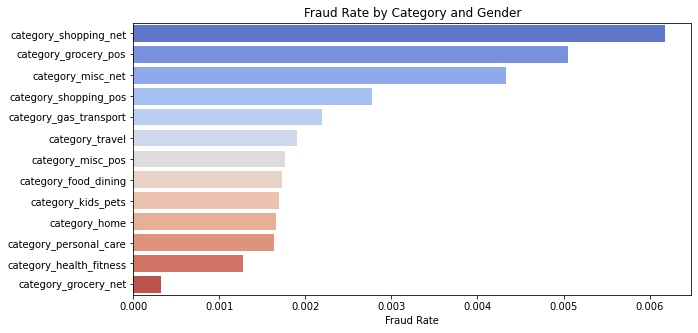

In [167]:
#원핫 인코딩된 카테고리별 Fraud 비율 시각화
cat_cols = [col for col in cc_df.columns if col.startswith('category_')]

fraud_rates = {col: cc_df.groupby(col)['is_fraud'].mean()[1] if 1 in cc_df[col].unique() else 0 
               for col in cat_cols}
fraud_rate_df = pd.DataFrame.from_dict(fraud_rates, orient='index', columns=['Fraud Rate'])
fraud_rate_df = fraud_rate_df.sort_values(by='Fraud Rate', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='Fraud Rate', y=fraud_rate_df.index, data=fraud_rate_df, palette='coolwarm')
plt.title('Fraud Rate by Category')
plt.show()

#shopping 및 grocery category 에서 fraud 가 많이 일어 났다는 것을 시각적으로 알 수 있음.

In [170]:
from sklearn.decomposition import PCA

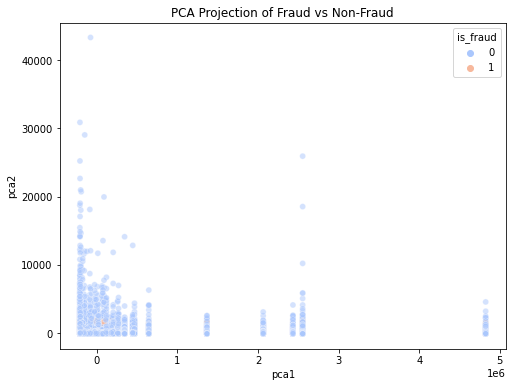

In [171]:
#PCA 결과 시각화 
X = cc_df.drop(columns=['is_fraud'])
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
cc_df['pca1'], cc_df['pca2'] = pca_result[:,0], pca_result[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=cc_df, x='pca1', y='pca2', hue='is_fraud', alpha=0.5, palette='coolwarm')
plt.title('PCA Projection of Fraud vs Non-Fraud')
plt.show()

#대부분의 거래들이 유사한 패턴을 가지며 정상 거래가 많다는 걸 의미
#사기 거래 점들은 (오렌지색) 거의 다수의 정상 거래(파란색) 속에 섞여 있어서, PCA 2차원 공간에서는 명확히 구분이 어려움

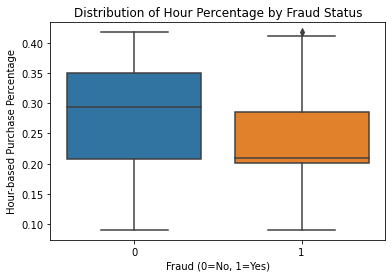

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시간대별 사기 비율
plt.figure(figsize=(6,4))
sns.boxplot(x='is_fraud', y='hour_perc', data=cc_df)
plt.title('Distribution of Hour Percentage by Fraud Status')
plt.xlabel('Fraud (0=No, 1=Yes)')
plt.ylabel('Hour-based Purchase Percentage')
plt.show()

회#정상 결제 시간대에 fraud 건수가 일어나서 시간대별로 구분하는 것이 유의미하지 않음 

In [175]:
# 회고
# 비정제 데이터 체험하기 프로젝트를 하면서 데이터 전처리 과정을 실습해보았다. 데이터셋의 전체를 확인 후 분석 방향에 따라
# 결측치 확인 및 제거, 이상치 확인 및 제거, 분석을 위한 컬럼 이름 변경 등을 하였고, 필요한 경우 데이터 값의 합, 평균, 표준편차 등을 
# 구하여 분석에 기반한 데이터를 추가하였다.
# 이렇게 전처리된 데이터를 핫원인코딩을 처리하여, boxplot, bar plot, PCA 분석 등으로 시각화 하여 분석 하는 방법을 배웠다.
# 전처리부터의 과정이 복잡하고 어려웠고, 특히 분석의 방향을 잡는 것이 쉽지는 않았지만 여러가지 실습을 통해서 분석하는 방법을 배웠다.
# 가장 적절한 분석방향과 방법을 찾기 위해서 raw data가 속한 산업군에 대한 백그라운드 파악이 매우 중요하고, 분석할 데이터의 디테일한 파악이
# 매우 중요하다고 느꼈다.